This is the exact same thing as the `viz_segment6.ipynb` notebook file, but it works with a different bit string length, as output by the `clustering_segments5b.ipynb` notebook file. It uses `.hsb` and `.hashb` files in the `route_hashes` directory.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Load the hash_master file
hash_df = pd.read_csv('../data/osstate/routes_hashes/hash_master.hashb', header=None, names=['wpf', 'wpt', 'hash'])
print(f"There are {len(hash_df)} rows")
hash_df.head()

There are 19466 rows


,wpf,wpt,hash
0,BdqjF4kdoWuF,FEQqm0pwCiHB,06355708377841511e89a4d57999c81ca8f7ac7d3ad371...
1,fsfzvUfF161g,g8jG0jNTYLWh,8635571817e841751e89a4c579ddc89c88f6a8753a1351...
2,TizH2bRw7vGs,xzpBLhCfzUsF,8225571897e841751f09a4c779dd889c88f6a8753a1211...
3,EThpIE3IBmHj,GPvokn2TQRgr,f044a2d69c87bf3e57775a2ab6f424ea55bc43031d2c8e...
4,uQXbsh0Pt5dR,Hoalau7wsbpF,f024335694c72f3457537aa637f404ea55bcc013192c8a...


In [3]:
hash_unique = hash_df['hash'].unique()
print('Number of unique hashes:', len(hash_unique))

Number of unique hashes: 470


In [4]:
# Rank the hashes by the number of times they appear
hash_counts = hash_df['hash'].value_counts()
hash_counts = hash_counts.sort_values(ascending=False)
hash_counts.head(10)


hash
f04432569487bf3e57775a2ab7f404ea55bcc1131d2c8ebaeadfc8e121934e9e8663f26847fdcc27c9cfeee8a76abeec7e39d55c7973cc99467abfc5_6f5    1776
8635570817e841751e89a4c579ddc89c88f6a8753a535102254d648c7c5e0511d53e836fdac2f7e7f287523e991367faccc70bc100d2749b261d10da_8b3     691
8225571897e041751f09a4c779dd889c88f6a8753a101102254d64907c5e0511d56ec36fdec2e7e7f287d63e991b77facc470bc029d2749b061f12db_8f3     575
8635571817e841751e89a4c579ddc89c88f6a8753a135102254d649c7c5e0511d53ec36fdec2f7e7f287d23e991b77faccc70bc109d2749b261d10da_8b3     552
8225571a97c041751f49a4c779dd8cfc98fee87538101382255d64907f5a0413d76ed36bdef2e7a7e287d63e994b76face470b5029d25c9b061e12db_8f3     552
8225571897e841751f09a4c779dd889c88f6a8753a121102254d64907c5e0511d56ec36fdec2e7e7f287d63e991b77facc470bc029d2749b061f12db_8f3     527
06355718176841711e89a4c559ddc89ca8f6a8753a535102254d649c7e5e1511d53e836fdac2f7e7f287523e991367faccc70bc100d2749b261d10da_8b3     463
a225571e97c043751741a4877ddd8cfcd8bee8773810129225dd64907d5a0413

In [5]:
# Load the waypoints_master file
wp_df = pd.read_csv('../data/osstate/waypoints_master.csv')
wp_df.head()

,ident,lat,lon
0,H882U2Xn5VOd,50.404884,-98.626030
1,P8ToOqoOwy3c,32.375521,130.663520
2,oZYSGKN80id2,41.086054,-77.855456
3,uPuRzZYavxw1,40.908554,-78.007263
4,lEf9PODPqPxe,40.573301,-78.509674


In [6]:
# df corresponding to the first hash value
hash_df1 = hash_df[hash_df['hash'] == hash_counts.index[2]]
print(f'There are {len(hash_df1)} rows for this hash pattern')
# sample randomly 100 rows
if len(hash_df1) > 100:
    hash_df1 = hash_df1.sample(100)
hash_df1.head()

There are 575 rows for this hash pattern


,wpf,wpt,hash
8395,N2RZN2hwjF26,4ps1MDrRwvHo,8225571897e041751f09a4c779dd889c88f6a8753a1011...
9068,y71PSaGgckGi,pNIBjZbQm2Vd,8225571897e041751f09a4c779dd889c88f6a8753a1011...
8692,ObxXrC0fy07o,25ylQt3NQGfn,8225571897e041751f09a4c779dd889c88f6a8753a1011...
11697,dGiFFCvD86uX,GLGep9jqYcGw,8225571897e041751f09a4c779dd889c88f6a8753a1011...
6039,Jr8nh3vz2iFs,sWUkBDLPH4Ux,8225571897e041751f09a4c779dd889c88f6a8753a1011...


In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy


def plot_segments(hash_df, wp_df, globe=False, ax=None):
    
    # Create a Cartopy PlateCarree projection
    projection = ccrs.PlateCarree()

    # Create a figure and axis with the PlateCarree projection
    if ax is None:
        fig, ax = plt.subplots(subplot_kw={'projection': projection})

    # Get the waypoints
    wpf = hash_df['wpf'].values
    wpt = hash_df['wpt'].values

    # For each wpf, get the longitude and latitude
    for i in range(len(wpf)):
        wpf_lon = wp_df[wp_df['ident'] == wpf[i]]['lon'].values[0]
        wpf_lat = wp_df[wp_df['ident'] == wpf[i]]['lat'].values[0]
        wpt_lon = wp_df[wp_df['ident'] == wpt[i]]['lon'].values[0]
        wpt_lat = wp_df[wp_df['ident'] == wpt[i]]['lat'].values[0]

        # Plot the segment
        ax.plot([wpf_lon, wpt_lon], [wpf_lat, wpt_lat], 'b', transform=projection)


    # Add map features
    ax.coastlines()
    if not globe:
        # Only add the borders for non-global maps
        ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    #ax.add_feature(cartopy.feature.LAND, edgecolor='black')
    #ax.add_feature(cartopy.feature.OCEAN)
    

    # Set the extent of the map
    if globe:
        ax.set_extent([-180, 180, -90, 90])

    # Show the plot
    if ax is None:
        plt.show()

# plot_segments(hash_df1, wp_df, globe=False)
# plot_segments(hash_df1, wp_df, globe=True)

In [8]:
def get_region_bounds(region: str) -> tuple:
    # Get the geographical boundaries for the map 
    if region=='conus':
        # Contiguous United States
        lat_bounds = [23, 51]
        lon_bounds = [-130, -65]
    elif region=='europe':
        # Europe, from Portugal to Greece, not including Russia
        lat_bounds = [34, 72]        
        lon_bounds = [-32, 40]
    else:
        raise ValueError(f"Region {region} not recognized. Use 'conus' or 'europe'.")
    
    return lat_bounds, lon_bounds

In [9]:
from tqdm import tqdm

def plot_all_flows(hash_counts: pd.DataFrame, hash_df: pd.DataFrame, wp_df: pd.DataFrame, n_rows = 5, n_cols = 5, globe = False, region = None) -> None:
    # Calculate the number of plots
    n_plots = n_rows * n_cols
    if n_plots > len(hash_counts):
        n_plots = len(hash_counts)
        n_rows = int(np.ceil(n_plots / n_cols))

    # Get the top n_plots hash values
    hash_values = hash_counts.head(n_plots).index

    # Create a figure
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
    
    if region is not None:
        lat_bounds, lon_bounds = get_region_bounds(region)
        # Set the extent of the map
        for ax in axs.flatten():
            ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]])

    # Plot the flows
    s = 0 # this is a variable to adjust the index for the plot since some plots will be skipped as they are irrelevant to the set region
    for i in tqdm(range(n_plots)):
        # Get the hash value
        hash_value = hash_values[i]

        # Get the data frame for this hash value
        hash_df_i = hash_df[hash_df['hash'] == hash_value]

        # If hash_df_i has more than 20 rows, sample 20 rows
        if len(hash_df_i) > 20:
            hash_df_i = hash_df_i.sample(20)
            
        # Skip this hash_value if the waypoints fall outside of the region
        if region is not None:
            wpf = hash_df_i['wpf'].values
            wpt = hash_df_i['wpt'].values
            # Only check the first wpf and wpt
            wpf_lon = wp_df[wp_df['ident'] == wpf[0]]['lon'].values[0]
            wpf_lat = wp_df[wp_df['ident'] == wpf[0]]['lat'].values[0]
            wpt_lon = wp_df[wp_df['ident'] == wpt[0]]['lon'].values[0]
            wpt_lat = wp_df[wp_df['ident'] == wpt[0]]['lat'].values[0]
            # If there is a single waypoint outside of the region, skip this hash value
            if not (lat_bounds[0] <= wpf_lat <= lat_bounds[1] and lon_bounds[0] <= wpf_lon <= lon_bounds[1] and
                    lat_bounds[0] <= wpt_lat <= lat_bounds[1] and lon_bounds[0] <= wpt_lon <= lon_bounds[1]):
                s += 1
                continue

        # Plot the segments
        plot_segments(hash_df_i, wp_df, globe=globe, ax=axs[(i-s) // n_cols, (i-s) % n_cols])

        # Add a title
        axs[(i-s) // n_cols, (i-s) % n_cols].set_title(f'Hash: {hash_value}')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [14]:
from tqdm import tqdm

color_codes = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def plot_all_flows_in_one_map(hash_counts: pd.DataFrame, hash_df: pd.DataFrame, wp_df: pd.DataFrame, n_first_hashes = 20, region = 'conus') -> None:

    # Get the top n_plots hash values
    hash_values = hash_counts.head(n_first_hashes).index
    
    # Create a Cartopy PlateCarree projection
    projection = ccrs.PlateCarree()

    # Create a figure
    fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
    
    lat_bounds, lon_bounds = get_region_bounds(region)
    
    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]])

    # Plot the flows on one single unique map
    for i in tqdm(range(n_first_hashes)):
        # Get the hash value
        hash_value = hash_values[i]

        # Get the data frame for this hash value
        hash_df_i = hash_df[hash_df['hash'] == hash_value]

        # If hash_df_i has more than 20 rows, sample 20 rows
        if len(hash_df_i) > 20:
            hash_df_i = hash_df_i.sample(20)
            
        # Skip this hash_value if the waypoints fall outside of the region
        if region is not None:
            wpf = hash_df_i['wpf'].values
            wpt = hash_df_i['wpt'].values
            # Only check the first wpf and wpt
            wpf_lon = wp_df[wp_df['ident'] == wpf[0]]['lon'].values[0]
            wpf_lat = wp_df[wp_df['ident'] == wpf[0]]['lat'].values[0]
            wpt_lon = wp_df[wp_df['ident'] == wpt[0]]['lon'].values[0]
            wpt_lat = wp_df[wp_df['ident'] == wpt[0]]['lat'].values[0]
            # If there is a single waypoint outside of the region, skip this hash value
            if not (lat_bounds[0] <= wpf_lat <= lat_bounds[1] and lon_bounds[0] <= wpf_lon <= lon_bounds[1] and
                    lat_bounds[0] <= wpt_lat <= lat_bounds[1] and lon_bounds[0] <= wpt_lon <= lon_bounds[1]):
                continue

        # Get the waypoints
        wpf = hash_df_i['wpf'].values
        wpt = hash_df_i['wpt'].values

        # For each wpf, get the longitude and latitude
        color_of_hash = color_codes[i % len(color_codes)]
        for j in range(len(wpf)):
            wpf_lon = wp_df[wp_df['ident'] == wpf[j]]['lon'].values[0]
            wpf_lat = wp_df[wp_df['ident'] == wpf[j]]['lat'].values[0]
            wpt_lon = wp_df[wp_df['ident'] == wpt[j]]['lon'].values[0]
            wpt_lat = wp_df[wp_df['ident'] == wpt[j]]['lat'].values[0]

            # Plot the segment
            ax.plot([wpf_lon, wpt_lon], [wpf_lat, wpt_lat], transform=projection, label=f'hs:{hash_value}', color=color_of_hash, alpha=0.5)

    # Add map features
    ax.coastlines()
    if region == 'conus':
        # Add state borders
        ax.add_feature(cartopy.feature.STATES, linestyle=':')
        plt.title(f'Top {n_first_hashes} flows for Contiguous United States identified by Zarya')
    elif region == 'europe':
        # Add country borders
        ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
        plt.title(f'Top {n_first_hashes} flows for Europe identified by Zarya')
    plt.tight_layout()
    # Set equal aspect ratio
    ax.set_aspect('equal', adjustable=None)
    plt.show()


In [15]:
# plot_all_flows(hash_counts, hash_df, wp_df, n_rows=10, n_cols=5, globe=False, region='conus')

100%|██████████| 120/120 [03:24<00:00,  1.70s/it]


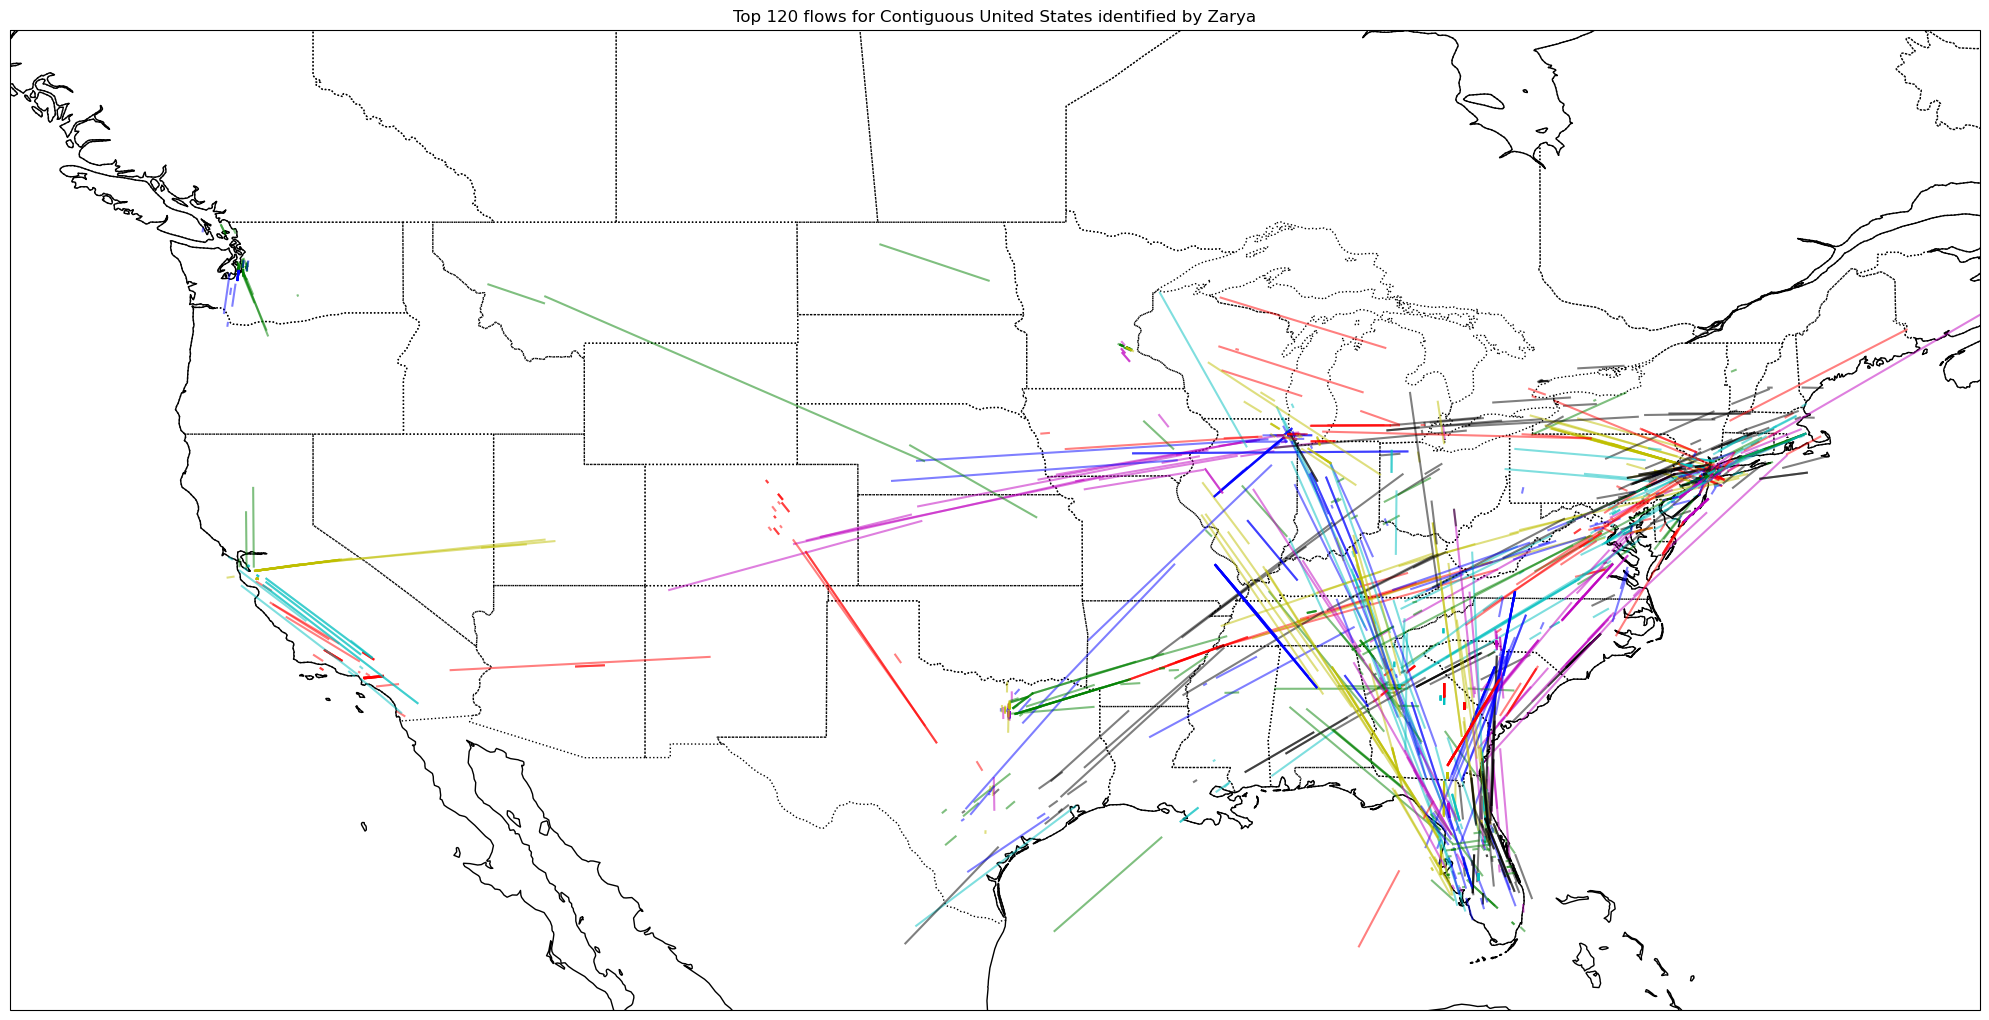

In [18]:
plot_all_flows_in_one_map(hash_counts, hash_df, wp_df, n_first_hashes=120, region='conus')

  0%|          | 0/120 [00:00<?, ?it/s]

100%|██████████| 120/120 [01:34<00:00,  1.28it/s]


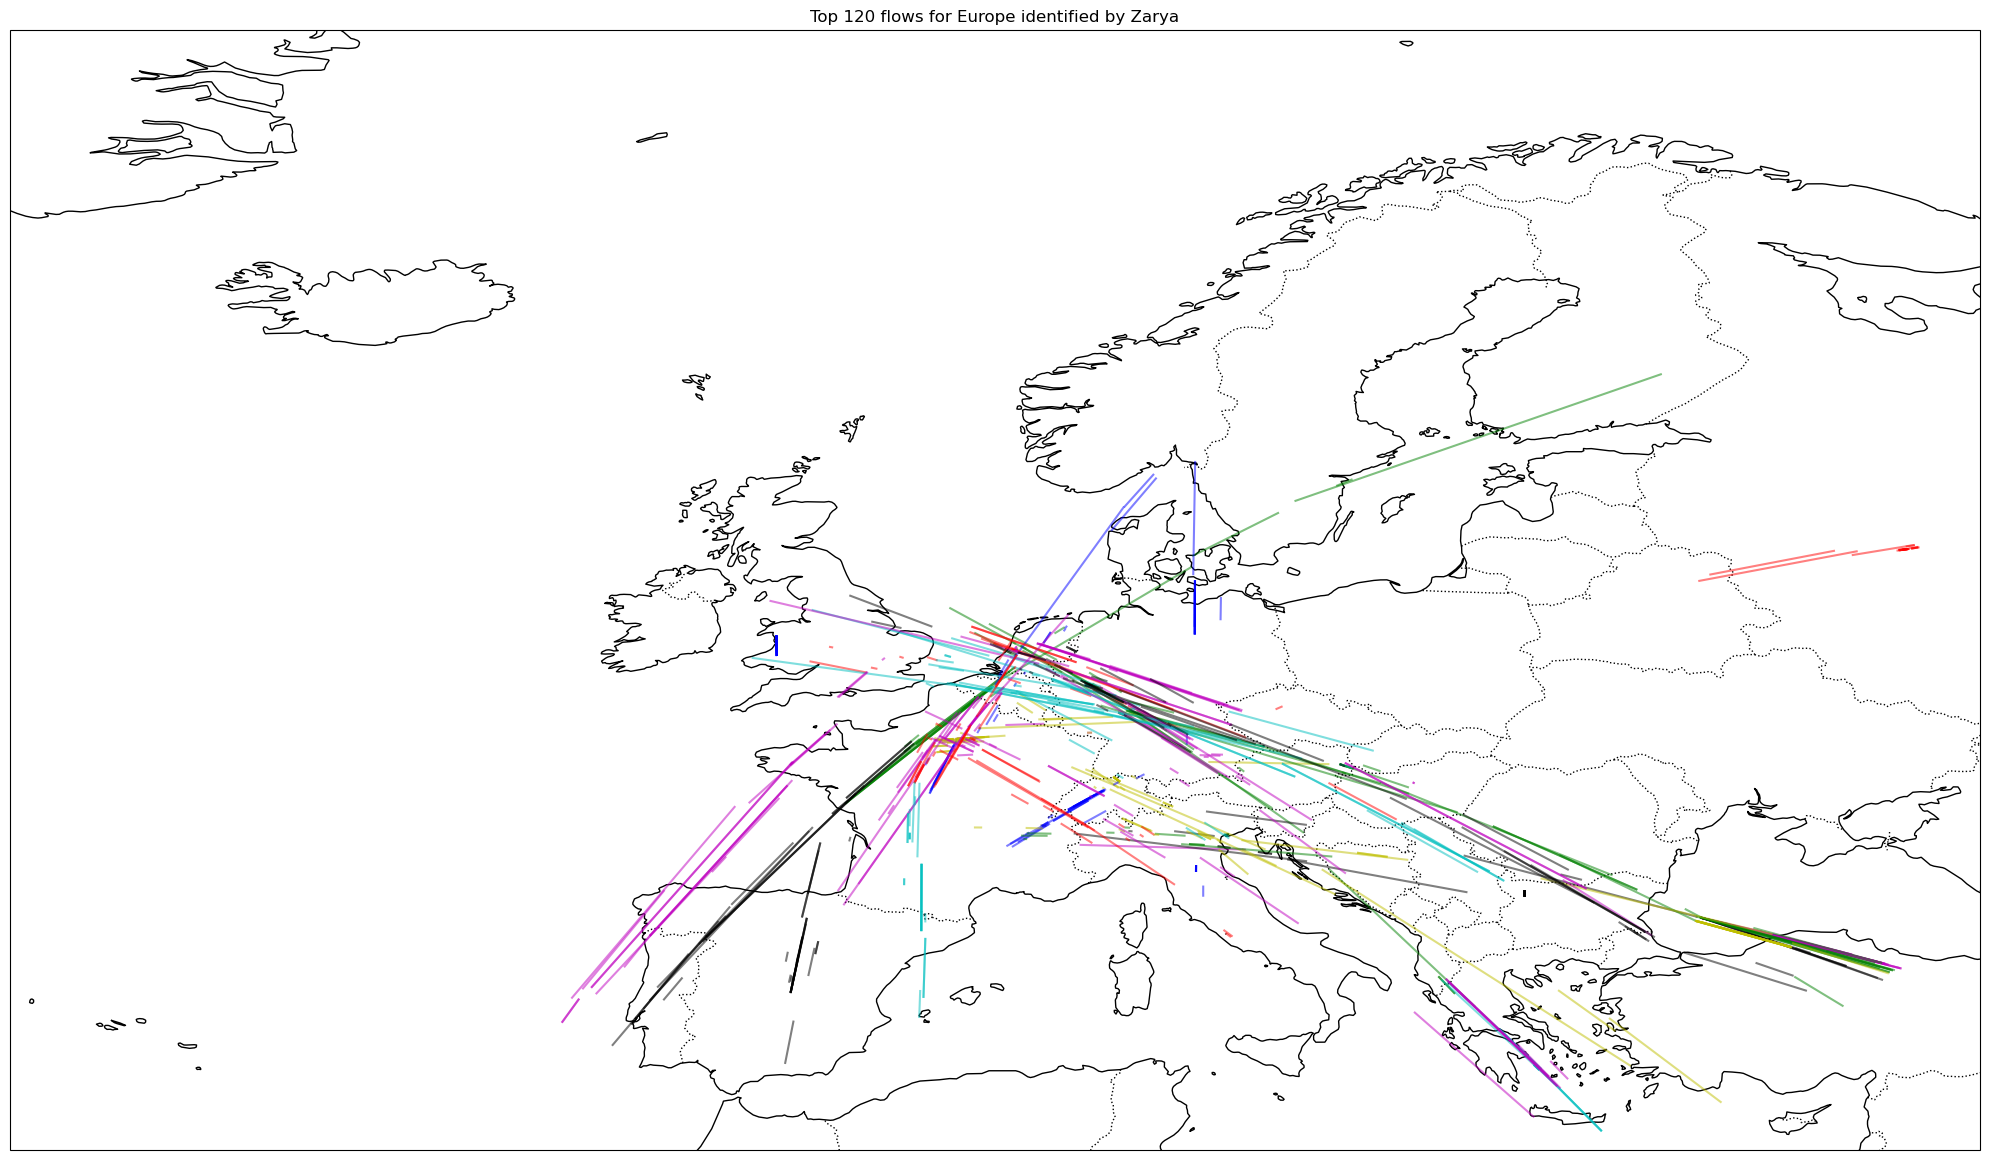

In [17]:
plot_all_flows_in_one_map(hash_counts, hash_df, wp_df, n_first_hashes=120, region='europe')